# (Linear classification) Learning = Finding a Separating Hyperplane

two classes: blue and green points

two examples: (2,2) = blue and (2,4) = green

we would like to find a separating hyperpline (a line in our case)

general form of a linear classifier: $$f(y)=\sum_{i=1}^n w_i*x_i$$

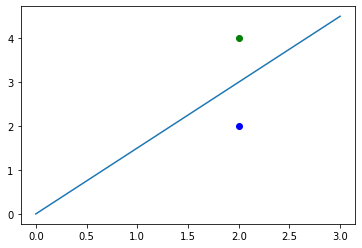

In [124]:
import matplotlib.pyplot as plt

# first arg: x values, sec. arg: y values
plt.plot([0,2,3],[0,3,4.5])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')

plt.show()

Note: there are many separating lines!

e.g. f(x) = 1.5 x + 0

we drop b, which is 0 in our case

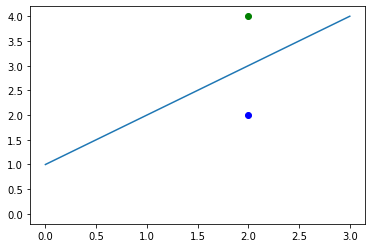

In [128]:
plt.plot([0,2,3],[1,3,4])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')
plt.plot([0],[0])

plt.show()

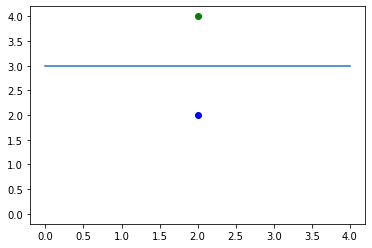

In [132]:
plt.plot([0,2,4],[3,3,3])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')
plt.plot([0],[0])

plt.show()

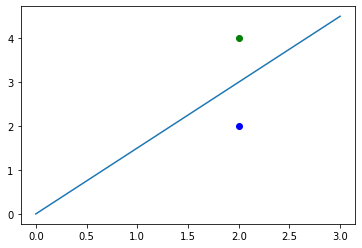

In [136]:
# back to f(x)=1,5x

plt.plot([0,2,3],[0,3,4.5])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')

plt.show()

# Classification based on the sign

hyperplane: $y = x_2 = 1.5 x_1$

* $x^j = (x_1,x_2)$ ($j$ is example index, $y=x_2$)


* $x^1 = (2,4)$
* $x^2 = (2,2)$


* $x_2 = 1.5 x_1$  (the hyperplane)

* we tranform the hyperplane to a format that acts as a decision boundary:
  * $x_2 - 1.5 x_1 = 0~~~~$or $~~~~ -1.5 x_1 + x_2 = 0$

## positive versus negative sign

if we instantiate the formula with the example feature vectors $x^j$, we get:
 
* $x^1 = 4 - 1.5*2 = 1$     class = above (positive)


* $x^2 = 2 - 1.5*2 = -1 $   class = below (negative)

## the sign function for mapping arbitrary values to -1 or 1

* $x^3 = (2,5)$


* $x^3 = 5 - 1.5*2 = 2$


* we use: $sign(-1.5 x_1 + x_2)$  


* i.e. $sign(5 -1.5 * 2)$

In [140]:
import numpy as np

np.sign(5 -1.5 * 2)

1.0

## How to find/induce the hyperplane

two ways:

* we define a error function and set the first derivative to zero and resolve it
* we define a error function and iteratively search for the minimal errors 

### Costs (as a function of the weights)

we initiate the weight vector randomly (!), say:

* $\vec{w} = w = (0.5)$  (weight vector)

we drop the arrow from vectors from now on

this is $f(x) = 0.5x + 0$ (we drop b which is 0)

$f(x) = 0.5x$

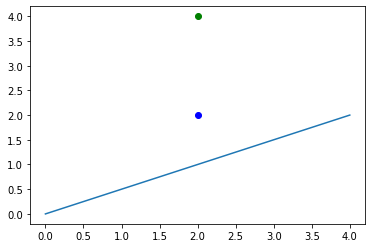

In [144]:
# the curve of f(x)=0.5x

plt.plot([0,2,4],[0,1,2])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')

plt.show()

## Learning = Minimizing Prediction Errors


$f_{pred}(x)=0.5x$

$f_{pred}(2) = y_{pred}= 1$ (Prediction for feature value x=2)

What is the error we make?

Error: sum of the errors wrt. to all instances $j$ (training examples)

We have two: ($x^j = (x,y_{obs})$)

* $x^1 = (2,4)$
* $x^2 = (2,2)$

Sum of Errors: error for $x^1$ + error for $x^2$ 

Single Error $e^j$: real y minus predicted y

* $e^1 = 4 - 1 = 3$
* $e^2 = 2 - 1 = 1$

* $e^1 + e^2 = 3 + 1 = 4$ 


In order to penalize larger error (and to simplify minimization) we square the errors!



* $e^1 = (4 - 1)^2 = 9$
* $e^2 = (2 - 1)^2 = 1$


* $e^1 + e^2 = 9 + 1 = 10$ 

In general:

 $$J(w) = \sum_{j=0}^M(y_{obs}^j - y_{pred}^j)^2~~~ or~~~ J(w) = \sum_{j=0}^M(y^j - w^Tx^j)^2  $$
 
 
 $$J(w) = \sum_{j=0}^M(y_{obs}^j - y_{pred}^j)^2 = (4-1)^2 + (2-1)^2 = 10$$

where M denotes the number of training examples

Note: the notation with $w^T$ assumes that both vectors are column vectors, we ignore this here. Both vectors are row vectors and we combine with the dot product.

## Cost Function $J$

We call $J$ the cost function, it is a function of the weight vector $w$

$J$ is a convex function, it general shape is $x^2$, the prototypical convex function.

The good news: convex function have a global minimum.

The global minimum gives us the best approximation, because it minimizes the error we make!

 
 Goal: find a weight vector such that the prediction error is minimal. We call it *least square approximation*.

 
 The first derivation of $J$ gives us the slope (gradient), we set it to zero to get the minimum.
 
 
 Figure: 1. curve is convex, 2. curve not. "convex: there exist no line that crosses the curve more than once
  
 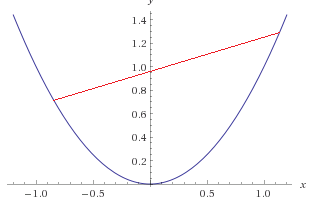
 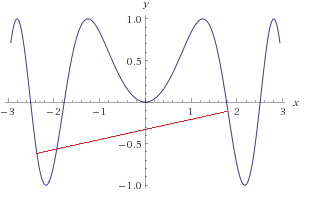


## First derivative equals zero


Our general formula is ($f(x)=wx + b$)

 $$J(w) = \sum_{j=0}^M(y^j - f(x^j))^2  ~~~or ~~~J(w) = \sum_{j=0}^M(y^j - wx^j - b)^2$$
 
first derivative:

$$J'(w) = \frac{\delta J(w,b)}{\delta b}= \sum_{i=1}^n[2(y_i - wx_i -b)(-1)]=0$$

Note: in the derivation we use $i$ instead of $j$. Moreover, we subscript instead of superscribe.
$x_1$ means: the value for coordinate $x$ of example 1; $y_1$ accordingly is the value of $y$ of example 1.

### Chain rule


* $f'(g(x)) = f'(g(x)) * g'(x)$

we take the partial derivative wrt. $b$

* $f(b) = g(b)^2$ thus $f'(b) = 2* g(b)$


* $g(b) = (y - w*x - b)$ thus $g'(b) = -1$  


* $f'(b) = 2* g(b) = 2(y_i - mx_i - b)$


which gives: $2(y_i - mx_i -b)(-1)$


$2(y_i - mx_i -b)(-1)=0$ iff $(y_i - mx_i -b)=0$

$$ \frac{\delta J(w,b)}{\delta b}= \sum_{i=1}^n[y_i - wx_i -b] $$
* addition and substraction are assoziative:
$$\frac{\delta J(w,b)}{\delta b}= [\sum_{i=1}^n y_i] - [w \sum_{i=1}^n x_i] - [nb] = 0$$

we divide by $n$ and get: $\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$ and $\bar{x} =  \frac{\sum_{i=1}^n x_i}{n}$ 

it follows: $$ b = \bar{y}-w\bar{x}$$

we replace $b$ by $b = \bar{y}-w\bar{x}$

$$J(w,b)= \sum_{i=1}^n (y_i - f(x_i))^2 = \sum_{i=1}^n (y_i - wx_i -  \bar{y}+w\bar{x})^2$$

again we use the chain rule to partially derive $w$

$$\frac{\delta J(w,b)}{\delta w}= \sum_{i=1}^n2(y_i - wx_i - \bar{y} + w\bar{x})(-x_i + \bar{x})=0$$

which gives (without 2, permuted):

$$\frac{\delta J(w,b)}{\delta w}= \sum_{i=1}^n(-1 (\bar{y} - y_i ) +  (w\bar{x}- wx_i))( \bar{x} - x_i )=0$$

which gives: 

$$\frac{\delta J(w,b)}{\delta w}= - \sum_{i=1}^n (\bar{y}-y_i  )( \bar{x} - x_i ) +  w \sum_{i=1}^n(\bar{x}- x_i)^2=0$$

resolved wrt. $w$:
$$w = \frac{\sum_{i=1}^n(\bar{y}-y_i)(\bar{x}-x_i)}{\sum_{i=1}^n(\bar{x}-x_i)^2}$$

$i$ here is the example index

## Finding the hyperplane for our examples

* $x^1 = (2,4)$
* $x^2 = (2,2)$


* $\bar{x}=2$
* $\bar{y}=3$

$w = 0$ since $(\bar{x}-x_i) = 0$ in  $$\frac{\sum_{i=1}^n(\bar{y}-y_i)(\bar{x}-x_i)}{\sum_{i=1}^n(\bar{x}-x_i)^2}$$

$b= \bar{y}-w\bar{x}=3 - 0 = 3$

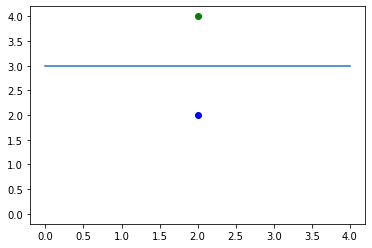

In [148]:
plt.plot([0,2,4],[3,3,3])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')
plt.plot([0],[0])

plt.show()

This was a closed form solution (we actually determined it by solving the equation)


We could rather use a iterative approach called gradient descend

# Gradient Descend

The derivation of our error function $J$ (now the general form, not just with one parameter). We use the chain rule.

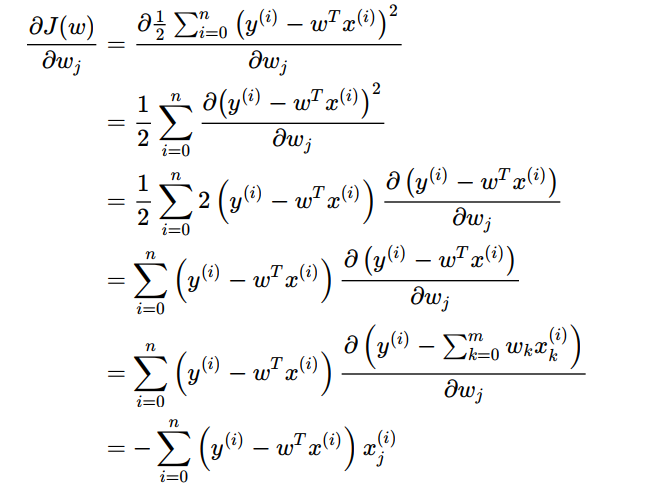

the last line gives as the slope at each point

procedure: we initialize $w$ randomly, we apply $J$ and get a value which is just a  particular point on the curve:

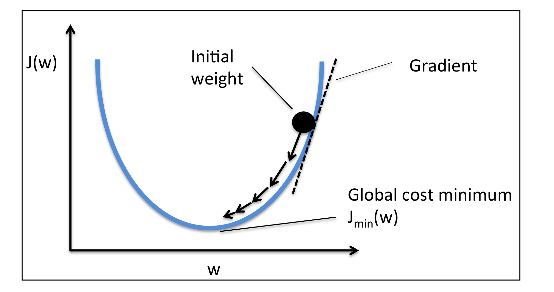 

* our point has a its sign either plus or minus


* if it is plus something, then we have to lower the weight (we are to the right of the minimum)
* if it is minus something, we have to increase the weigth (we are to the left of the minimum)

* to what extend should decrease or increase?
* in order to avoid missing the minimum, we should do it slowly

* we define a learning rate $\eta$


  $$\Delta(w_j)=-\eta \frac{\partial  J}{\partial w_j}$$
  
i.e. for each weight $w_j$ we deterine a delta, some correction of the weight, scaled by $\eta$

* if the slope is negative, we get a plus (minus + minus = plus). The adapted weight is then: $w_j=w_j+\Delta w_j$
* if the slope is positive, we get a minus (minus + plus = minus). The adapted weight is then: $w_j=w_j-\Delta w_j$



In [152]:
X1=[2]   # vector 1
X2=[2]   # vector 2 

Y1=4       # y of vector 1 observed
Y2=2       # y of vector 2 observed

w1=0.5     # arbitrary weight

eta=0.1    # learning rate

the initial hyperplane is: $y=0.5*x1 

In [156]:
# prediction with dot product

import numpy as np

np.dot([w1],X1)

3.0

$y$ prediction is 1 for both instances $x^1, x^2$ with 4, 2 as $y_{obs}$

eq 1 (slope): $-\sum_{j=1}^{n=2}(y^{(j)}-w^Tx^{(j)})x_j^{(j)}$ (first (partial) derivative of $J$ wrt. to $w_j$)

$x^{(j)}$ = $j$ is index for example

$w^Tx^{(i)}~~~~$ in Python: $~~~~$np.dot([w1],X1)

In [160]:
# X1=[2], X2=[2], w1=[0.5], Y1=4, Y2=2

def deriv(j):  # weight j (we have only one)
    """ the (slope of) error is the sum of the individual errors (slopes), i.e. with respect to all examples 
        (here only X1, X2)
        j is the index of the weight we adjust (j is set by the function call)
    """
    return -((Y1-np.dot([w1],X1))*X1[j]+    # j=0, X1[j]=2
             (Y2-np.dot([w1],X2))*X2[j])    

The error function $err$ is defined as the 1. derivative of $J$. In the definition above, we replace the sum by a simple addition (we only have 2 term to sum.
$X1[j]$ is the x value of the weight under adaption.
 
We call this the Delta rule!

In [ ]:
w1= w1 +  (-eta *  deriv(0))   
w1                      

In [167]:
# prediction of y with the adapted weight

np.dot([w1],X1),np.dot([w1],X2) 

(2.999521576250686, 2.999521576250686)

In [ ]:
# new adaption

w1= w1 +  (-eta *  deriv(0))   
w1                      

In [174]:
np.dot([w1],X1),np.dot([w1],X2) 

(2.999559850150631, 2.999559850150631)

we do it in a loop n times (called epochs)

In [ ]:
# it converges at 3 for y, the weight converges at 1.5

epochs=200

i=0
while i < epochs:
    w1= w1 + (-eta * deriv(0))  # Adaption von Gewicht w1
    i+=1
    

print("predictions:",np.dot([w1],X1),np.dot([w1],X2),"    final weight:",w1)

our new formula is (remember, we started with f(x)=0.5x):

$f(x)=w * x$ where w = 1.5 (the learning result, the hyperplane)

This is our decision boundary (and thus our classifier):

* $x_2 - 1.5 * x_1 = 0~~~~$ or $~~~~-1.5x_1 + x_2 = 0~~~~$ (we use the last ordering)

It predicts 3 for x=2, the error is (4-3)^2 and (2-3)^2= 2 (compared to 10 at the beginning)

* $w = [-1.5,1]$
* $x = [x_1,x_2]$

We apply it to (i.e. classify) our examples:

* $-1.5 * 2 + 4 = 1$  (vector 1: above the line)

* $-1.5 * 2 + 2= -1$ (vector 2 below the line)

i.e the examples of the different classes are perfectly separated by our line

#  This is our classifier $w \cdot x$ !


In [ ]:
# first arg: x values, sec. arg: y values
plt.plot([0,1,2,2.5],[0,1.5,3,3.75])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')

plt.show()

In [184]:
# the classifier w dot y

w = [-1.5,1]

# ordering is [y,x]
x1=[2,4]

x2=[2,2]

np.dot(w,x1),np.dot(w,x2)

(1.0, -1.0)

### All in all

In [ ]:
# Gradient Descend for hyperlane learning (minimizing the error)
import numpy as np

X1=[2]
X2=[2]

Y1=4
Y2=2

w1=0.5

eta=0.01    # the learning rate

def deriv(j): # the value of the first derivative
    
    return -((Y1-np.dot([w1],X1))*X1[j]+    
             (Y2-np.dot([w1],X2))*X2[j])    

def error():  # squared error
    
    return  ((Y1-np.dot([w1],X1))**2+    
             (Y2-np.dot([w1],X2))**2)    


epochs=100
i=0
w,e=[],[]
while i < epochs:
    w.append(w1)
    e.append(error())
    w1= w1 + (-eta * deriv(0))
    i+=1
    

np.dot([w1],X1),np.dot([w1],X2)

Note: the error is minimized because the hyperplane is exactly inbetween the two point. If we move it towards on of the point the error $J$ increases (because of the square)


In [191]:
# the progression of the weight and the error

w,e

([0.5,
  0.58,
  0.6536,
  0.721312,
  0.7836070399999999,
  0.8409184768,
  0.893644998656,
  0.94215339876352,
  0.9867811268624384,
  1.0278386367134433,
  1.065611545776368,
  1.1003626221142586,
  1.132333612345118,
  1.1617469233575086,
  1.188807169488908,
  1.2137025959297953,
  1.2366063882554117,
  1.2576778771949788,
  1.2770636470193806,
  1.29489855525783,
  1.3113066708372036,
  1.3264021371702273,
  1.340289966196609,
  1.3530667689008802,
  1.3648214273888097,
  1.375635713197705,
  1.3855848561418886,
  1.3947380676505376,
  1.4031590222384946,
  1.4109063004594151,
  1.418033796422662,
  1.424591092708849,
  1.4306238052921412,
  1.43617390086877,
  1.4412799887992684,
  1.4459775896953269,
  1.4502993825197008,
  1.4542754319181248,
  1.4579333973646749,
  1.4612987255755008,
  1.4643948275294607,
  1.467243241327104,
  1.4698637820209357,
  1.472274679459261,
  1.47449270510252,
  1.4765332886943185,
  1.478410625598773,
  1.4801377755508711,
  1.4817267535068015,
 

In [236]:
plt.plot(w,e)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

In [202]:
# if we start with a higher weight: 10 instead of 0.5
# we get the righthand side of the parabel

w1=10

eta=0.01

epochs=100
i=0
w,e=[],[]
while i < epochs:
    w.append(w1)
    e.append(err2(0))
    w1= w1 + (-eta * deriv(0))
    i+=1
    
np.dot([w1],X1),np.dot([w1],X2)

NameError: name 'err2' is not defined

In [209]:
plt.plot(w,e)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

## Heaviside step function

The distance of point to the hyperplane normally is different from 1. We thus map it with e.g. the *Heaviside  step function (unit_step)* e.g. $\theta=0$) to its (algebraic) sign:




$$\hat{y} = \phi({x})= \left \{ \begin{array}{ll}
1 &if~ x \geq \theta\\
-1 &if~ x < \theta\\
 \end{array}
\right .$$

In [216]:
theta=0
unit_step = lambda x: -1 if x < theta else 1

unit_step(-4),unit_step(2)

(-1, 1)

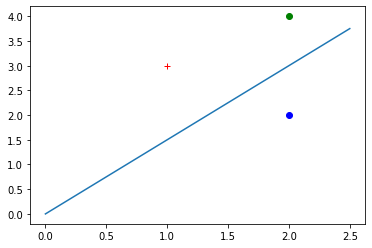

In [219]:
# classifying a new point (the red plus)

plt.plot([0,1,2,2.5],[0,1.5,3,3.75])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')
plt.plot([1],[3],'r+')


plt.show()

In [222]:
w=[-1.5,1]
X3=[1,3]                                # prediction of the class of a new instance
np.dot(w,X3),unit_step(np.dot(w,X3))    # first the distance to the hyperplane, then the class (which is 1)

(1.5, 1)

# Wrap up (so far)

Given linear separability, then we can find a separating line between objects that can be used as a classifier. The cost function is fundamental, e.g. least squared distance. This allows both regression (to be shown) and classification to be realized. An important technique is the gradient descent method, the gradient is given by the derivative of the error function, its sign determines the direction of the weight adaptation. Learning is therefore the optimization of a weight vector.

Conceptually, the idea behind the gradient method is extremely simple:

* $y = unit\_step(w_0*x_0 + w_1*x_1, .., w_n*x_n$), with $\theta$ as an arbitrary threshold (e.g. 0)


* note: a threshold other than zero might have influence on eta and the number of epochs


* if $y$ is smaller than $\theta$, we have to increase the weights (slightly)  


* otherwise we have to decrease

Again for clarification: the principle is maximally simple - if the function to be learned returns a value that is erroneously above the threshold value, the weights must be reduced (by a small amount), otherwise they are incremented. 

We have answered the question how to do this inrementation or decrementation in a systemic way.

This very basic approach dates back to the work of Frank Rosenblatt in 1958 (see below): the perceptron algorithm

## sklearn (scikit-learn)

sklearn is a machine learning library for the Python for classification, regression and clustering, e.g. support vector machines, random forests and knn.

* uniform interface to learning algorithm
* object-oriented

* use an array $X$ of array to represent data
* use an array of labels $y$ to represent classes
* draw an instance of the learning approach (class)
* "fit(X,y)" means "learn"
* use "predict" to classify new examples

## Perceptron (Frank Rosenblatt 1958)

* meant as a simplified model of human brain: neurons and synapses
* we have an activation and a threshold
* if the activation $a$ is higher than the threshold $\theta$: neuron fires 
* step function models firing of neurons
* heaviside(x) = y = $\left \{ \begin{array}{ll}
1 &if~ a > \theta\\
0 &if~ a < \theta\\
 \end{array}
\right .$

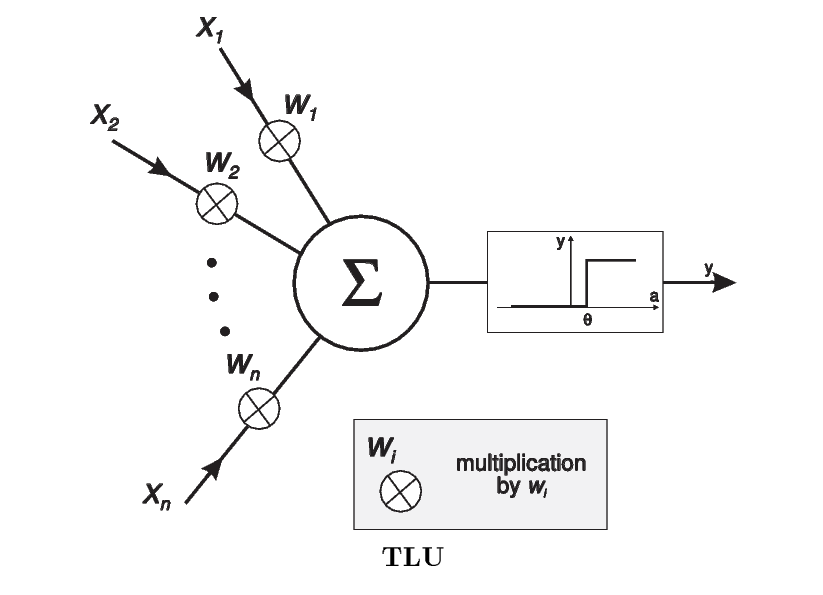

* it's just a linear function: $x_1*w_1+\ldots+x_i*w_i+\ldots+x_n*w_n = \Sigma$


* if $\Sigma>\theta$ then $y=1$ otherwise $y=0$


* Note: we are free to specify the output of step function, we could as well have used -1 (as we did so far)

In [237]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=600)

X=[[2,4],[2,2]]
y=[1,0]

clf.fit(X, y)

clf.predict([[1,1]])

array([0])

In [238]:
# inspect the model: intercept = y offset (we called it "b"), coef = the weights

clf.intercept_,clf.coef_

(array([-1.]), array([[-2.,  2.]]))

## Probability of class membership

* So far: a binary decision of class membership
* the perceptron does not give us a probability, just a class
* how to get the probability of class membership


* derivation of the sigmoid formula(s): see script derivation.pdf
* idea: map values of the classifier to intervall [0..1] - with a corresponding function, e.g. sigmoid

Note: The following is just in order to illustrate the very idea. In order to incoporate simoid properly in the learning process, we have to integrate it into the derivation of $J$.

Redefinition (broadly): the error $J$ is now dependent of the 1st derivative of the sigmoid function as well

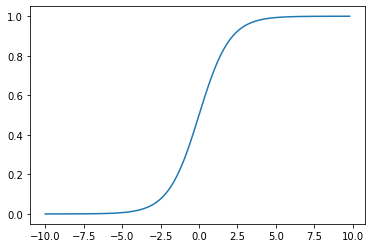

In [229]:
import math
import matplotlib.pyplot as plt
import numpy as np
    
def sigmoid_plot(x):   # only for ploting
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid_plot(x)

plt.plot(x,sig)
plt.show()

In [230]:
def pos(x):   # sigmoid function: probability of class 1
    return 1/(1+math.exp(-x))

def neg(x):  # sigmoid function: probability of class 0
    return 1/(1+math.exp(x))

w=[-1.5,1]
X3=[1,3]                                # prediction of the class of a new instance

np.dot(w,X3),pos(np.dot(w,X3))

pos(-6),neg(-6),pos(6),neg(6)

(0.0024726231566347743,
 0.9975273768433653,
 0.9975273768433653,
 0.0024726231566347743)

In [231]:
from sklearn.linear_model import LogisticRegression

X = [[1,1,0,0],[1,0,1,0],[0,1,0,0],[0,0,1,1]]   # data as array of arrays (e.g. (Non)Spam emails)
y=[1,1,0,0]                                     # labels of the given data arrays  

clf = LogisticRegression(random_state=0,solver='lbfgs').fit(X, y)  # "fit" means "learn"

clf.predict([[0,1,1,0],[1,0,0,0]])               # new (unseen) data: predict labels

array([0, 1])

In [232]:
# give the probabilities for each example for all classes (Spam, Nonspam)

clf.predict_proba([[0,1,1,0],[1,0,0,0]])   

array([[0.5740005 , 0.4259995 ],
       [0.38444827, 0.61555173]])

## Supervised Setting

So far, we treated learning as a regression task: find the hyperplane best approximating a couple of points.
But this only works if the data is in fact linearly separable. Then the regression hyperplane is the also the separating hyperplane of the two classes.

Suppose we had one additional point (2,3) (besides (2,2) and (2,4)).
This point lies on the hyperplane. We can't thus assign it a class (1 or 0)

We totally ignored the supervised nature of learning: we know the class, because we have a training set.

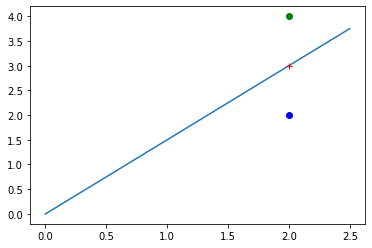

In [233]:
plt.plot([0,1,2,2.5],[0,1.5,3,3.75])
plt.plot([2],[2],'bo')
plt.plot([2],[4],'go')
plt.plot([2],[3],'r+')


plt.show()

## Representing the class

We add a final (in our case third) dimension that represents the class: 1 or -1 (sometimes 0 is used)

* (2,2) becomes (2,2,-1)
* (2,4) becomes (2,4,1)
* the new point (2,3) becomes (2,3,1) (for example)

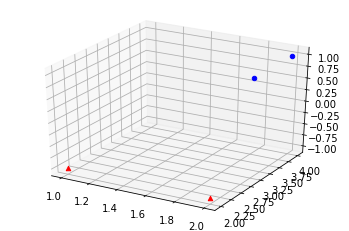

In [234]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(2,4,1,c='b',marker='o')
ax.scatter(2,2,-1,c='r',marker='^')
ax.scatter(2,3,1,c='b',marker='o')
ax.scatter(1,2,-1,c='r',marker='^')

plt.show()

In [235]:
import numpy as np

X1=[2,4]
X2=[2,2]

Y1=1    # supervised setting: class of X1 is 1
Y2=-1

w=[1,1] # arbitrary set weight vector

eta=0.01    # the learning rate

def deriv(j): # the value of the first derivative
    
    return -((Y1-np.dot(w,X1))*X1[j]+(Y2-np.dot(w,X2))*X2[j])    

epochs=1000
i=0
while i < epochs:
    w[0]= w[0] + (-eta * deriv(0))
    w[1]= w[1] + (-eta * deriv(1))
    i+=1
    
np.dot(w,X1),np.dot(w,X2)

(0.9983199108192884, -0.9971963101331689)

## (Derivation of the)  Cost function with sigmoid 

The cost function for the dot product scenario (b absorbed):

$$J(w_j) = \sum_{i=0}^M(y^i - w_jx^i)^2$$

The cost function for the sigmoid scenario:

$$J(w) = \sum_{j=0}^M(y^j - \sigma(wx^j))^2$$


$\sigma(x) = \frac{1}{1+e^{-x}}~~~$ with the first derivative: $~~~\sigma(x)' = \sigma(x)(1-\sigma(x))$

* partial derivative:

$$\frac{\delta J(w)}{\delta w^j}$$

* chain rule in Leibnitz notation:

$$\frac{\delta J(w)}{\delta w^j}= \frac{\delta J}{\delta z} * \frac{\delta z}{\delta \sigma} * \frac{\delta \sigma}{\delta w^j}$$
where $z = (y_i - g(w^jx_i)^2$

# Wrap up

* the perceptron only gives class predictions
* logistic regression gives probabilities